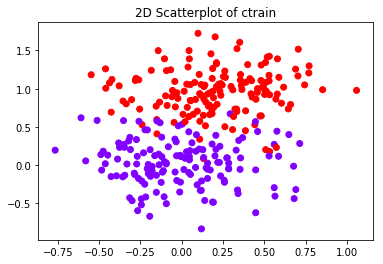

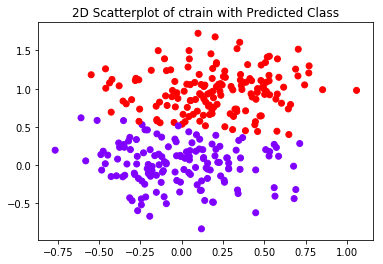

Classification Report for ctrain Classifier:
               precision    recall  f1-score   support

     class 1       0.95      0.94      0.95       150
     class 2       0.94      0.95      0.95       150

   micro avg       0.95      0.95      0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300

fpr: [0.   0.06 1.  ] 
tpr: [0.         0.95333333 1.        ] 
thresholds: [2. 1. 0.]


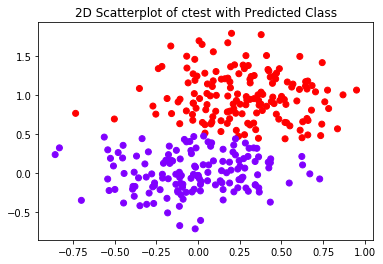

Classification Report of ctest with Predicted Class:
               precision    recall  f1-score   support

     class 1       0.97      0.95      0.96       150
     class 2       0.95      0.97      0.96       150

   micro avg       0.96      0.96      0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300

Classification Report of ctrain with k = 1:
               precision    recall  f1-score   support

     class 1       1.00      1.00      1.00       150
     class 2       1.00      1.00      1.00       150

   micro avg       1.00      1.00      1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

fpr: [0. 0. 1.] 
tpr: [0. 1. 1.] 
thresholds: [2. 1. 0.] 

Classification Report of ctrain with k = 3:
               precision    recall  f1-score   support

     class 1       0.95      0.97      0.96       150
     class 2       0.97      0.95 

In [6]:
# Victoria Rhine - Problem Set 4
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# import data files
ctest = np.load('ctest.npy')
ctrain = np.load('ctrain.npy')
seed_data = np.load('seed_data.npy')

# class labels in 1D array form.
ctest_labels = ctest[:,2]
ctrain_labels = ctrain[:,2]
seed_labels = seed_data[:,7]

# problem 1
# I can visualize the class boundary but I think it could be 
# more defined because there is still some mixture of class data
plt.scatter(ctrain[:,0], ctrain[:,1], c = ctrain_labels, cmap = 'rainbow')
plt.title("2D Scatterplot of ctrain") 
plt.show()

# problem 2 
# fit naive bayes classifier
model = GaussianNB()
model.fit(ctrain[:,:2], ctrain_labels)

# predict training data
predict_train = model.predict(ctrain[:,:2])

# problem 3
plt.scatter(ctrain[:, 0], ctrain[:,1], c = predict_train, cmap = 'rainbow')
plt.title("2D Scatterplot of ctrain with Predicted Class") 
plt.show()

# problem 4
# calculate precision, recall, and receiver operator curve
target_names = ['class 1', 'class 2']
print("Classification Report for ctrain Classifier:\n", 
      classification_report(ctrain_labels, predict_train, target_names = target_names))
fpr, tpr, thresholds = metrics.roc_curve(ctrain_labels, predict_train, pos_label = None)
print("fpr:", fpr, "\ntpr:", tpr, "\nthresholds:", thresholds)

# problem 5
# applying classifier to ctest
# the results on ctest data are not equivalent
predict_test = model.predict(ctest[:,:2])
plt.scatter(ctest[:,0], ctest[:,1], c = predict_test, cmap = 'rainbow')
plt.title("2D Scatterplot of ctest with Predicted Class") 
plt.show()

print("Classification Report of ctest with Predicted Class:\n", 
      classification_report(ctest_labels, predict_test, target_names = target_names))

# problem 6
# knn on ctrain, create 3 classifiers
# fit nearest neighbor classifiers
neigh1 = KNeighborsClassifier(n_neighbors = 1)
neigh1.fit(ctrain[:,:2], ctrain_labels)
neigh1_predict = neigh1.predict(ctrain[:,:2])

neigh3 = KNeighborsClassifier(n_neighbors = 3)
neigh3.fit(ctrain[:,:2], ctrain_labels)
neigh3_predict = neigh3.predict(ctrain[:,:2])

neigh7 = KNeighborsClassifier(n_neighbors = 7)
neigh7.fit(ctrain[:,:2], ctrain_labels)
neigh7_predict = neigh7.predict(ctrain[:,:2])

# problem 7
# calculate precision, recall, and receiver operator curve
# k = 1 classifier appears to have the best results
print("Classification Report of ctrain with k = 1:\n", 
      classification_report(ctrain_labels, neigh1_predict, target_names = target_names))
fpr, tpr, thresholds = metrics.roc_curve(ctrain_labels, neigh1_predict, pos_label = None)
print("fpr:", fpr, "\ntpr:", tpr, "\nthresholds:", thresholds, "\n")

print("Classification Report of ctrain with k = 3:\n", 
      classification_report(ctrain_labels, neigh3_predict, target_names = target_names))
fpr, tpr, thresholds = metrics.roc_curve(ctrain_labels, neigh3_predict, pos_label = None)
print("fpr:", fpr, "\ntpr:", tpr, "\nthresholds:", thresholds, "\n")

print("Classification Report of ctrain with k = 7:\n", 
      classification_report(ctrain_labels, neigh7_predict, target_names = target_names))
fpr, tpr, thresholds = metrics.roc_curve(ctrain_labels, neigh7_predict, pos_label = None)
print("fpr:", fpr, "\ntpr:", tpr, "\nthresholds:", thresholds, "\n")

# problem 8
# knn on ctest
# it appears the results are the same for test data and training data
# on k = 1 and k = 2 but k = 3 does not produce equivalent results
neigh1_predict = neigh1.predict(ctest[:,:2])
neigh3_predict = neigh3.predict(ctest[:,:2])
neigh7_predict = neigh7.predict(ctest[:,:2])

# classification results
print("Classification Report of ctest with k = 1:\n", 
      classification_report(ctest_labels, neigh1_predict, target_names = target_names))

print("Classification Report of ctest with k = 3:\n", 
      classification_report(ctest_labels, neigh3_predict, target_names = target_names))

print("Classification Report of ctest with k = 7:\n", 
      classification_report(ctest_labels, neigh7_predict, target_names = target_names))

# problem 9
# working with ctrain data
# fit decision tree classifiers
nolimit_tree = DecisionTreeClassifier()
nolimit_tree.fit(ctrain[:,:2], ctrain_labels)
nolimit_tree_predict = nolimit_tree.predict(ctrain[:,:2])

limited_tree = DecisionTreeClassifier(max_depth = 3)
limited_tree.fit(ctrain[:,:2], ctrain_labels)
limited_tree_predict = limited_tree.predict(ctrain[:,:2])

# problem 10
# calculate precision, recall, and receiver operator curve
# no limit to tree depth appears to have the best results
print("Classification Report of ctrain with No Depth Limit:\n", 
      classification_report(ctrain_labels, nolimit_tree_predict, target_names = target_names))
fpr, tpr, thresholds = metrics.roc_curve(ctrain_labels, nolimit_tree_predict, pos_label = None)
print("fpr:", fpr, "\ntpr:", tpr, "\nthresholds:", thresholds, "\n")

print("Classification Report of ctrain with Limit on Depth:\n", 
      classification_report(ctrain_labels, limited_tree_predict, target_names = target_names))
fpr, tpr, thresholds = metrics.roc_curve(ctrain_labels, limited_tree_predict, pos_label = None)
print("fpr:", fpr, "\ntpr:", tpr, "\nthresholds:", thresholds, "\n")

# problem 11
# working with ctest data
# the results are not the same. better results 
# for ctrain with no depth limit versus ctest 
# with no depth limit and better results for 
# ctest with depth limit versus ctrain with depth limit
nolimit_tree_predict = nolimit_tree.predict(ctest[:,:2])
limited_tree_predict = limited_tree.predict(ctest[:,:2])

# classification results
print("Classification Report of ctest with No Depth Limit:\n", 
      classification_report(ctest_labels, nolimit_tree_predict, target_names = target_names))

print("Classification Report of ctest with Limit on Depth:\n", 
      classification_report(ctest_labels, limited_tree_predict, target_names = target_names))

print("\n====================LAST SECTION====================\n")

# problem 12 and problem 13
# using naive bayes
model = GaussianNB()
predict_seed = model.fit(seed_data[:,:7], seed_labels).predict(seed_data[:,:7])

print("Classification Report of Seed Data (naive):\n", classification_report(seed_labels, predict_seed), 
      "\nConfusion Matrix for Seed Data (naive):\n", confusion_matrix(seed_labels, predict_seed), "\n")

# using k nearest neighbors 
seed_knn3 = KNeighborsClassifier(n_neighbors = 3)
seed_knn3.fit(seed_data[:,:7], seed_labels)
seed_knn3_predict = seed_knn3.predict(seed_data[:,:7])

print("Classification Report of Seed Data knn 3:\n", 
      classification_report(seed_labels, seed_knn3_predict), 
      "\nConfusion Matrix of Seed Data knn 3:\n", confusion_matrix(seed_labels, seed_knn3_predict), "\n")

seed_knn7 = KNeighborsClassifier(n_neighbors = 7)
seed_knn7.fit(seed_data[:,:7], seed_labels)
seed_knn7_predict = seed_knn7.predict(seed_data[:,:7])

print("Classification Report of Seed Data knn 7:\n", 
      classification_report(seed_labels, seed_knn7_predict),
      "\nConfusion Matrix of Seed Data knn 7:\n", confusion_matrix(seed_labels, seed_knn7_predict), "\n")

# using decision tree classifiers
tree2 = DecisionTreeClassifier(max_depth = 2)
tree2.fit(seed_data[:,:7], seed_labels)
tree2_predict = tree2.predict(seed_data[:,:7])

print("Classification Report of Seed Data with 2 Depth:\n", 
      classification_report(seed_labels, tree2_predict),
      "\nConfusion Matrix of Seed Data with 2 Depth:\n", confusion_matrix(seed_labels, tree2_predict), "\n")

tree3 = DecisionTreeClassifier(max_depth = 3)
tree3.fit(seed_data[:,:7], seed_labels)
tree3_predict = tree3.predict(seed_data[:,:7])

print("Classification Report of Seed Data with 3 Depth:\n", 
      classification_report(seed_labels, tree3_predict),
      "\nConfusion Matrix of Seed Data with 3 Depth:\n", confusion_matrix(seed_labels, tree3_predict), "\n")

# analyzing different classifiers on seed data
# knn with k = 3 appears to have the best results and 
# it appears that the decision tree with max depth of 3 is a close second
# I think it would hold up well on new data but that does not 
# necessarily mean it would be the best choice for that data set. 
# In earlier examples, k = 1 performed better so k = 3 might
# work well with seed data but could be lacking on different data.